<a href="https://colab.research.google.com/github/hongjinhao/MA4829-Group-Assignment/blob/main/Problem_Statement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MA4829 Problem Statement 1:
What factors are most important to those who do not own a car but wish to purchase one?

##Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Import dataset

To import dataset, please click on the 'folder' icon on the left to open up the local disk in this Google Colab, then upload the 'dataset.xls' file to it. Then the dataset can be loaded for exploration. The dataset can be found in the shared google drive folder.

In [ ]:
file_path = '/content/dataset.xlsx'
df = pd.read_excel(file_path)

##Data Exploration

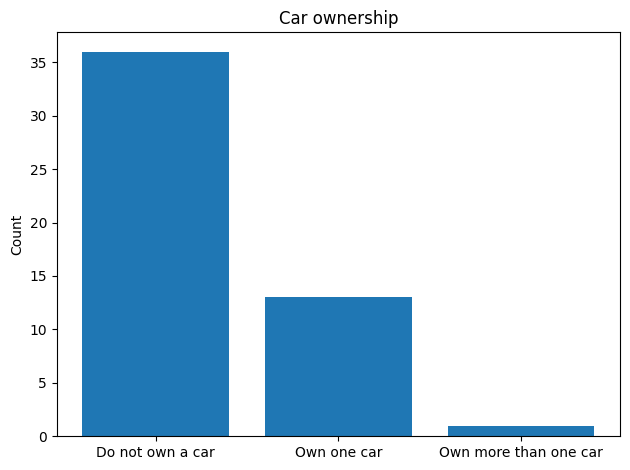

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract necessary columns
extracted_df = df.iloc[:, [2, 4, -1]]  # Selecting the third, fifth, and last columns

# Tally the number of categorical responses in column 3
category_counts = extracted_df.iloc[:, 0].value_counts()

# Define custom x-axis labels
custom_labels = ["Do not own a car", "Own one car", "Own more than one car"]

# Plot a histogram with custom x-axis labels
plt.bar(range(len(category_counts)), category_counts.values)
plt.ylabel('Count')
plt.title('Car ownership')
plt.xticks(range(len(category_counts)), custom_labels)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Data Cleaning

In [ ]:
# Convert categorical data to one-hot encoding

factor_columns = df.iloc[:, 4].str.get_dummies(';') # Extract keywords delineated by ;
factor_columns.columns = [col.strip() for col in factor_columns.columns]  # Remove whitespaces
print(factor_columns)

    Aesthetics  Brand name  Customisable options  Functionality  Price  Size  \
0            0           0                     1              1      1     1   
1            1           1                     0              1      1     1   
2            1           0                     1              1      0     0   
3            1           1                     1              1      1     1   
4            1           1                     0              1      1     0   
5            1           1                     0              1      1     1   
6            0           0                     0              1      1     0   
7            0           1                     0              1      1     0   
8            1           1                     0              1      1     1   
9            0           0                     0              0      1     0   
10           1           1                     0              0      1     1   
11           1           1              

## Count number of consideration factors by each potential car buyer

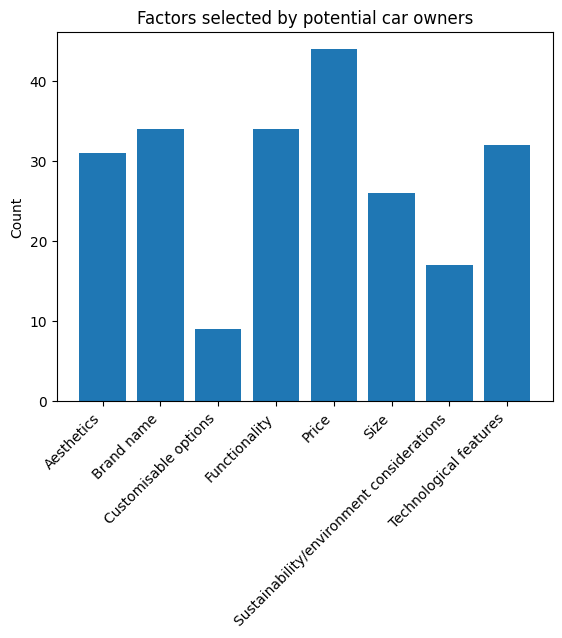

In [ ]:
# Tally the number of one hot encodings
tally = factor_columns.sum()

# Plot histogram
plt.bar(tally.index, tally.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Factors selected by potential car owners')
plt.show()


## Word Cloud Visualisation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['sg', 'flag', 'colour', 'related', 'car', 'paint', 'rains', 'lot', 'umbrella', 'holder', 'extendable', 'shelter', 'coffeeshop', 'iced', 'coffee', 'takeaway', 'plastic', 'drink', 'holder', 'long', 'thin', 'design', 'hook', 'top', 'straw', 'area', 'streamline', 'body', 'shape', 'microsmall', 'car', '2', 'sitter', 'hooks', 'hang', 'drinks', 'coffee', 'shops', 'come', 'plastic', 'bag', 'petrol', 'expensive', 'singapore', 'car', 'fuel', 'efficiency', 'ev', 'welcome', 'well', 'hook', 'hold', 'packet', 'drinks', 'smaller', 'car', 'sporty', 'look', 'affordabledue', 'coe', 'make', 'many', 'customization', 'look', 'like', 'hatchback', 'cars', 'due', 'small', 'space', 'singapore', 'automated', 'aircon', 'temperature', 'regulator', 'driver', 'feel', 'comfortable', 'without', 'adjusting', 'temperature', 'singapore', 'hot', 'driver', 'lower', 'temperature', 'bad', 'environment', 'classic', 'look', 'solar', 'panel', 'included', 'car', 'save', 'energy', 'bumper', 'grilles', 'redesigned', 'sing', 'wor

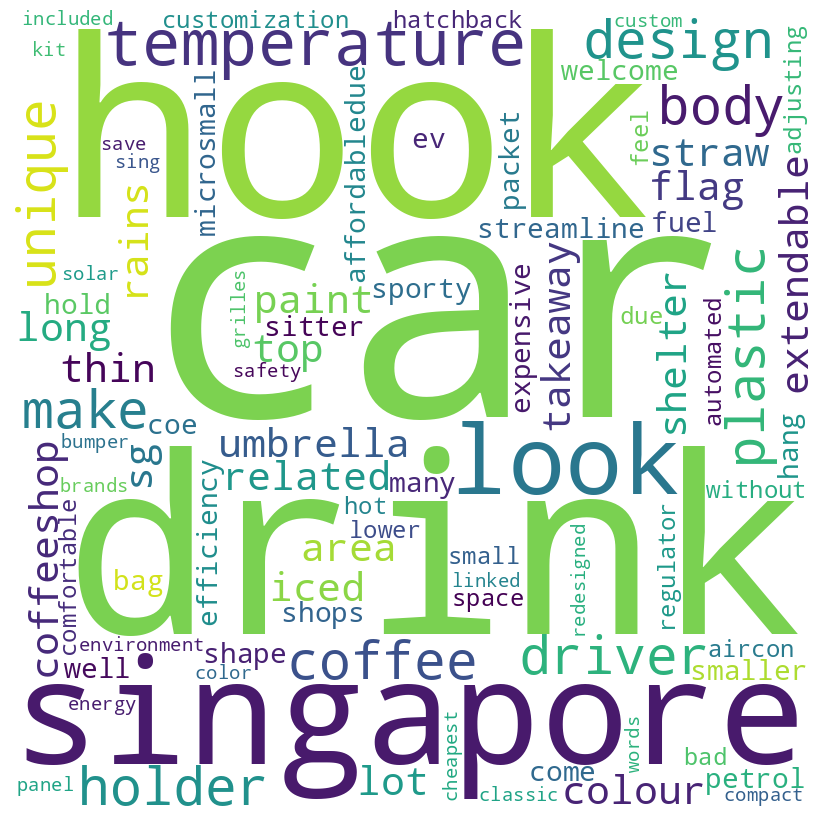

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

# Download
nltk.download('punkt')
nltk.download('stopwords')

# Extract necessary columns
extracted_df = df.iloc[:, [-1]]  # Selecting the last column
extracted_df = extracted_df.dropna() # Drop rows with NaN
responses = extracted_df[1:] # Remove first row

merged_responses = ""
for index, row in responses.iterrows():
    merged_responses += row.iloc[-1] + " " # Merge into a single string


# Text normalisation
merged_responses = merged_responses.lower()

# Remove punctuation
merged_responses = merged_responses.translate(str.maketrans('', '', string.punctuation))

# Word tokenisation
tokens = word_tokenize(merged_responses)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

print(filtered_tokens)


# Word cloud generation
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(filtered_tokens))

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)